In [2]:
# Import the important packages
import pandas as pd

pd.set_option('display.max_columns', None)

In [4]:
# Load the data
mod_input = pd.read_csv('../../data/model_input.csv')

In [12]:
# Data manip
from sklearn import preprocessing

x = mod_input[['game.ppgdiff_home']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
xdf = pd.DataFrame(x_scaled)

In [14]:
Y = mod_input[['game.homewin']]

In [15]:
Y.describe()

,game.homewin
count,10629.000000
mean,0.546994
std,0.497810
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [17]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

C:\Users\athompson-leduc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.649245
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.057     
Dependent Variable: game.homewin     AIC:              13803.6563
Date:               2020-05-10 23:41 BIC:              13810.9276
No. Observations:   10629            Log-Likelihood:   -6900.8   
Df Model:           0                LL-Null:          -7320.4   
Df Residuals:       10628            LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
--------------------------------------------------------------------
         Coef.     Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1       2.2372      0.0783    28.5822    0.0000    2.0838    2.3906



In [18]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=123)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\athompson-leduc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\athompson-leduc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

print('the threshold is', Y.mean())

Accuracy of logistic regression classifier on test set: 0.64
the threshold is game.homewin    0.546994
dtype: float64


In [20]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[491 473]
 [287 875]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.51      0.56       964
           1       0.65      0.75      0.70      1162

    accuracy                           0.64      2126
   macro avg       0.64      0.63      0.63      2126
weighted avg       0.64      0.64      0.64      2126



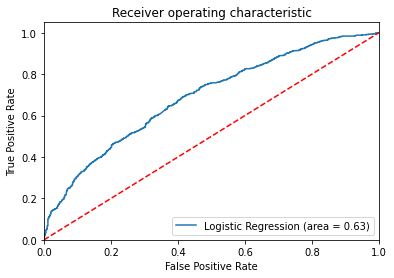

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()